In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer

In [3]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

# EDA NEW DATASET

# Category processing

In [4]:
first_model_df = pd.read_csv('/Users/shivanibalaji/Downloads/review_and_business_data_cleaned_withdate.csv')
first_model_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,review_id,user_id,review_stars,useful,funny,cool,text,date,reviewlen
0,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",9bMxu3-RCv0ncYnNNNkbWg,IMguz1Z9dp8HG0UfeLEdEg,5.0,3.0,0.0,1.0,I've been coming to this dry cleaner for almos...,2016-06-23 05:50:54,361.0
1,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",b-B3ycJZmOTP5EdWTwCsMA,_TAVpa1Y2_5KZ5wWYeX_6g,1.0,1.0,0.0,0.0,They lost 2 pairs of my suitpants and told me ...,2011-10-27 23:35:10,282.0
2,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",MaIIb4Er_LuqN3zSSdA06w,45R6BBybzwDuJaL08d1myQ,5.0,1.0,0.0,0.0,I have been going to this dry cleaning since I...,2013-07-13 03:25:04,543.0
3,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",N8z7ppoHET-6m7O60Hau1g,lYvUtZWr1gGv4vlwNcJXDQ,1.0,2.0,0.0,0.0,The staff is very nice and friendly. However ...,2016-05-07 16:01:55,777.0
4,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",jLVbrB6JJFpnrb-_6YwGOQ,b0eCjnqua4C3f0OLDhZHxA,1.0,1.0,1.0,0.0,DO NOT GO HERE. They are great until there i...,2013-01-28 10:40:43,859.0


In [5]:
first_model_df["categories"] = first_model_df['categories'].astype(str)

In [6]:
category_string = []
dict_cat = {}
for i in range(len(first_model_df["categories"].values)):
        for j in range(len(first_model_df["categories"].values[i].split(","))):
            
            if first_model_df["categories"].values[i].split(",")[j] not in dict_cat:
                dict_cat[first_model_df["categories"].values[i].split(",")[j]] = 1
            else:
                dict_cat[first_model_df["categories"].values[i].split(",")[j]] += 1

In [7]:
sorted(dict_cat.items(), key=lambda x: x[1])[-100:]

[(' Massage', 6975),
 (' Fitness & Instruction', 7241),
 ('Italian', 7291),
 ('Pizza', 7302),
 (' Diners', 7317),
 (' Chicken Wings', 7405),
 (' Ice Cream & Frozen Yogurt', 7413),
 ('Automotive', 7549),
 (' Thai', 7623),
 (' Mediterranean', 7630),
 ('Breakfast & Brunch', 7900),
 (' French', 7949),
 ('Japanese', 8070),
 (' Korean', 8183),
 ('Active Life', 8185),
 ('Mexican', 8288),
 (' Pubs', 8398),
 ('Sandwiches', 8442),
 ('Seafood', 8455),
 (' Home & Garden', 9052),
 ('Home Services', 9212),
 ('American (Traditional)', 9315),
 ('Hotels & Travel', 9328),
 (' Real Estate', 9386),
 ('Health & Medical', 9541),
 (' Soup', 9640),
 (' Wine Bars', 9783),
 (' Vegetarian', 9919),
 (' Waxing', 10161),
 (' Nail Salons', 10371),
 (' Auto Repair', 11015),
 (' Juice Bars & Smoothies', 11044),
 ('Bars', 11088),
 (' Local Flavor', 11186),
 (' Music Venues', 11363),
 (' Caterers', 11489),
 (' Professional Services', 11762),
 (' Skin Care', 11773),
 (' Sports Bars', 11966),
 (' Venues & Event Spaces', 1

In [8]:
first_model_df.shape

(679950, 23)

In [9]:
first_model_df[first_model_df['categories'].str.contains("Italian|Pizza|Diners|Chicken|Yogurt|Thai|Mediterranean|Breakfast|Brunch|French|Japanese|Korean|Mexican|Pubs|Sandwich|Seafood|Soup|Wine|Bars|Vegetarian|Juice|Flavor|Baker|Beer|Vegan|Barbeque|Cafe|Food|Buffet|Chinese|Sushi|Salad|Pizza|Italian|Coffee|Tea|Steak|Dessert|Burger|Sandwich|Restaurant", flags=re.IGNORECASE, regex=True)].shape

(421003, 23)

In [10]:
# Assigning the new dataframe as the main DF
yelp_data = first_model_df[first_model_df['categories'].str.contains("Italian|Pizza|Diners|Chicken|Yogurt|Thai|Mediterranean|Breakfast|Brunch|French|Japanese|Korean|Mexican|Pubs|Sandwich|Seafood|Soup|Wine|Bars|Vegetarian|Juice|Flavor|Baker|Beer|Vegan|Barbeque|Cafe|Food|Buffet|Chinese|Sushi|Salad|Pizza|Italian|Coffee|Tea|Steak|Dessert|Burger|Sandwich|Restaurant", flags=re.IGNORECASE, regex=True)]

In [11]:
yelp_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,review_id,user_id,review_stars,useful,funny,cool,text,date,reviewlen
58,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,NaN,Las Vegas,NV,89109.0,36.128561,-115.171130,4.5,11.0,...,{'Friday': '18:0-0:0'},3YqK4FWeq2hPRFIIuDkv4w,-xDW3gYiYaoeVASXywTPgw,5.0,20.0,8.0,19.0,For real.\nThis place has INCREDIBLE pizza! \n...,2018-03-29 00:13:11,679.0
60,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,J3JlYjXed3THOUJ7ULBCoQ,OE5MNd5PVORXxcrHEoWPdA,1.0,1.0,1.0,1.0,Do not stop here if you are wanting fast food....,2016-07-04 21:04:10,360.0
61,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,UrngYfT6p3nODopogwVzTg,7S2wwOSVSRn4CEZdtQKG_Q,4.0,3.0,4.0,5.0,"""Yo Quiero Taco Bell!"" \n\nFor a Taco Bell thi...",2014-05-12 00:45:44,722.0
62,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,lZXy2R3TiE5lmY4DpQiQqw,IRMEgNiP4IMRqw8i00ZMug,5.0,1.0,1.0,0.0,Okay I don't know what manager is in charge he...,2018-08-17 00:07:51,711.0
63,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,1wSvl6EDA1N6F0DJOD0LZg,XUEwSGOGARxW-3gPiGJKUg,4.0,3.0,3.0,3.0,The Stuft Nacho box was pretty good. The serv...,2015-05-30 23:50:42,111.0


# Text Analysis

## Data Cleaning

In [12]:
yelp_data.text = yelp_data.text.astype(str)
yelp_data.dtypes

/Users/shivanibalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


business_id      object
name             object
address          object
city             object
state            object
postal_code     float64
latitude        float64
longitude       float64
stars           float64
review_count    float64
is_open         float64
attributes       object
categories       object
hours            object
review_id        object
user_id          object
review_stars    float64
useful          float64
funny           float64
cool            float64
text             object
date             object
reviewlen       float64
dtype: object

In [13]:
import string
from nltk.corpus import stopwords
stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))

In [14]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
# Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return " ".join([word for word in nopunc.split() if word.lower() not in stop])

yelp_data['text'] = yelp_data['text'].apply(text_process)


<ipython-input-14-260349e08bb6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_data['text'] = yelp_data['text'].apply(text_process)


In [15]:
yelp_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,review_id,user_id,review_stars,useful,funny,cool,text,date,reviewlen
58,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,NaN,Las Vegas,NV,89109.0,36.128561,-115.171130,4.5,11.0,...,{'Friday': '18:0-0:0'},3YqK4FWeq2hPRFIIuDkv4w,-xDW3gYiYaoeVASXywTPgw,5.0,20.0,8.0,19.0,real place INCREDIBLE pizza go Tenaya Creek dr...,2018-03-29 00:13:11,679.0
60,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,J3JlYjXed3THOUJ7ULBCoQ,OE5MNd5PVORXxcrHEoWPdA,1.0,1.0,1.0,1.0,stop wanting fast food Nothing place fast thou...,2016-07-04 21:04:10,360.0
61,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,UrngYfT6p3nODopogwVzTg,7S2wwOSVSRn4CEZdtQKG_Q,4.0,3.0,4.0,5.0,Yo Quiero Taco Bell Taco Bell one better locat...,2014-05-12 00:45:44,722.0
62,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,lZXy2R3TiE5lmY4DpQiQqw,IRMEgNiP4IMRqw8i00ZMug,5.0,1.0,1.0,0.0,Okay know manager charge whatever change Give ...,2018-08-17 00:07:51,711.0
63,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,1wSvl6EDA1N6F0DJOD0LZg,XUEwSGOGARxW-3gPiGJKUg,4.0,3.0,3.0,3.0,Stuft Nacho box pretty good service fast frien...,2015-05-30 23:50:42,111.0


In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shivanibalaji/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Generate sentiment scores
sentiment_scores = yelp_data['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])

Text(0, 0.5, 'Review Star Rating')

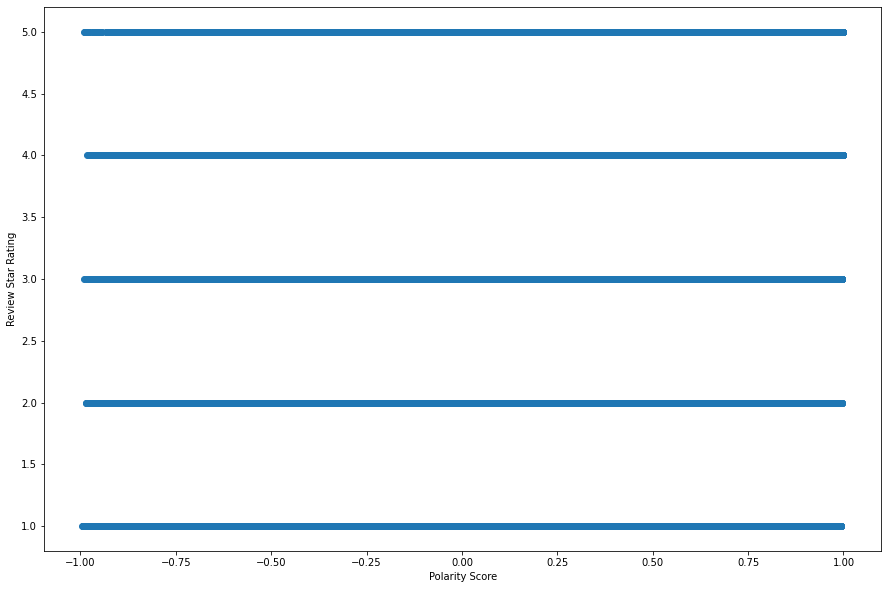

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(sentiment, yelp_data['review_stars'])
plt.xlabel('Polarity Score')
plt.ylabel('Review Star Rating')

In [19]:
yelp_data['polarity_score'] = sentiment

<ipython-input-19-1bf63a7ea8d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_data['polarity_score'] = sentiment


In [20]:
yelp_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,review_id,user_id,review_stars,useful,funny,cool,text,date,reviewlen,polarity_score
58,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,NaN,Las Vegas,NV,89109.0,36.128561,-115.171130,4.5,11.0,...,3YqK4FWeq2hPRFIIuDkv4w,-xDW3gYiYaoeVASXywTPgw,5.0,20.0,8.0,19.0,real place INCREDIBLE pizza go Tenaya Creek dr...,2018-03-29 00:13:11,679.0,0.9699
60,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,J3JlYjXed3THOUJ7ULBCoQ,OE5MNd5PVORXxcrHEoWPdA,1.0,1.0,1.0,1.0,stop wanting fast food Nothing place fast thou...,2016-07-04 21:04:10,360.0,-0.8271
61,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,UrngYfT6p3nODopogwVzTg,7S2wwOSVSRn4CEZdtQKG_Q,4.0,3.0,4.0,5.0,Yo Quiero Taco Bell Taco Bell one better locat...,2014-05-12 00:45:44,722.0,0.9429
62,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,lZXy2R3TiE5lmY4DpQiQqw,IRMEgNiP4IMRqw8i00ZMug,5.0,1.0,1.0,0.0,Okay know manager charge whatever change Give ...,2018-08-17 00:07:51,711.0,0.9586
63,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,1wSvl6EDA1N6F0DJOD0LZg,XUEwSGOGARxW-3gPiGJKUg,4.0,3.0,3.0,3.0,Stuft Nacho box pretty good service fast frien...,2015-05-30 23:50:42,111.0,0.8519


In [27]:
yelp_data[['polarity_score', 'text']][:10]

,polarity_score,text
58,0.9699,real place INCREDIBLE pizza go Tenaya Creek dr...
60,-0.8271,stop wanting fast food Nothing place fast thou...
61,0.9429,Yo Quiero Taco Bell Taco Bell one better locat...
62,0.9586,Okay know manager charge whatever change Give ...
63,0.8519,Stuft Nacho box pretty good service fast frien...
64,0.0000,taco bell always takes forever Pulled drive th...
65,-0.5709,Absolutely disgusting drive thru 30 minutes an...
66,-0.5859,takes long get food mother got food poisoning ...
67,-0.7351,Terrible location Staffed seemingly entirely t...
68,-0.3612,Teenage staff slow microscopic portions even t...


In [22]:
one_star_mean = np.round(yelp_data['polarity_score'][yelp_data['review_stars'] ==1].mean(), 3)
one_star_mean

-0.024

In [23]:
two_star_mean  = np.round(yelp_data['polarity_score'][yelp_data['review_stars'] ==2].mean(),3)
two_star_mean

0.445

In [24]:
three_star_mean  = np.round(yelp_data['polarity_score'][yelp_data['review_stars'] ==3].mean(),3)
three_star_mean

0.715

In [25]:
four_star_mean  = np.round(yelp_data['polarity_score'][yelp_data['review_stars'] ==4].mean(),3)
four_star_mean

0.86

In [26]:
five_star_mean  = np.round(yelp_data['polarity_score'][yelp_data['review_stars'] ==5].mean(),3)
five_star_mean

0.886

<BarContainer object of 5 artists>

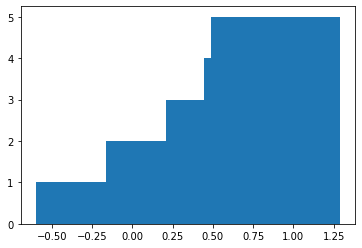

In [193]:
mean_polarity = [one_star_mean, two_star_mean, three_star_mean, four_star_mean, five_star_mean]

plt.bar(mean_polarity, [1, 2, 3, 4, 5])

Text(0, 0.5, 'Review Star Rating')

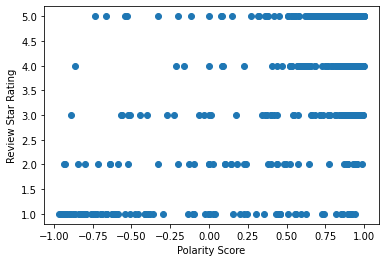

In [178]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Generate sentiment scores
sentiment_scores_1 = yelp_data['text'][:1000].apply(sid.polarity_scores)
sentiment_1 = sentiment_scores_1.apply(lambda x: x['compound'])


plt.scatter(sentiment_1, yelp_data['review_stars'][:1000])
plt.xlabel('Polarity Score')
plt.ylabel('Review Star Rating')